# 1. Import libraries and data exported from 4.9

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\swapn\Instacart Basket Analysis 06_24'

In [4]:
df_final = pd.read_pickle( r'C:\Users\swapn\Instacart Basket Analysis 06_24\Data\Prepared Data\orders_products_combined_2.pkl')

In [5]:
df_final.shape

(32433030, 30)

In [6]:
#Checking dataframe
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,eval_set,...,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,1107,7,0,38259,prior,...,NaN,Bean,Female,District of Columbia,68,2019-06-30,2,married,142744,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,5319,3,1,196224,prior,...,Roger,Casey,Male,New York,48,2018-04-29,2,married,43906,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,7540,4,1,138499,prior,...,Andrea,Summers,Female,Massachusetts,31,2017-03-11,2,married,78505,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,9228,2,0,79603,prior,...,Nicholas,Logan,Male,Tennessee,65,2019-10-27,1,married,51010,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,9273,30,0,50005,prior,...,Carl,Mcfarland,Male,New Jersey,75,2019-04-09,3,married,115468,both


In [7]:
import gc
gc.collect()

0

# 2. Address security implications


In [9]:
#  Display all the columns of a DataFrame
pd.options.display.max_columns = None

In [10]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,1107,7,0,38259,prior,2,1,11,7.0,4,New customer,7.163333,Low_spender,30.0,Non-frequent customer,NaN,Bean,Female,District of Columbia,68,2019-06-30,2,married,142744,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,5319,3,1,196224,prior,65,1,14,1.0,99,Loyal customer,5.342729,Low_spender,1.0,Frequent customer,Roger,Casey,Male,New York,48,2018-04-29,2,married,43906,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,7540,4,1,138499,prior,8,0,14,7.0,23,Regular customer,7.469540,Low_spender,7.0,Frequent customer,Andrea,Summers,Female,Massachusetts,31,2017-03-11,2,married,78505,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,9228,2,0,79603,prior,2,2,10,30.0,5,New customer,6.986207,Low_spender,30.0,Non-frequent customer,Nicholas,Logan,Male,Tennessee,65,2019-10-27,1,married,51010,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,9273,30,0,50005,prior,1,1,15,NaN,22,Regular customer,7.493154,Low_spender,7.0,Frequent customer,Carl,Mcfarland,Male,New Jersey,75,2019-04-09,3,married,115468,both


In [11]:
df_final.shape

(32433030, 30)

In [12]:
# first name and surname should be dropped due to PII


In [13]:
df_final.drop(['first_name', 'surname'], axis=1, inplace = True)

In [14]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'customer_frequency', 'frequency_flag', 'Gender',
       'State', 'Age', 'date_joined', 'dependants', 'family_status', 'income',
       '_merge'],
      dtype='object')

In [15]:
import gc
gc.collect()

0

# 3. Create a regional segmentation of the data

In [17]:
# Set up region column
# Create Region column - organize by state and region

In [18]:
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [19]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinos', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [20]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [21]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [22]:
# Create region columns

In [23]:
df_final.loc[df_final['State'].isin(northeast_region), 'region'] = 'Northeast'

In [24]:
df_final.loc[df_final['State'].isin(midwest_region), 'region'] = 'midwest'

In [25]:
df_final.loc[df_final['State'].isin(south_region), 'region'] = 'south'

In [26]:
df_final.loc[df_final['State'].isin(west_region), 'region'] = 'west'

In [27]:
# Checking length of new column
len(df_final['region'])

32433030

In [28]:
# Checking data
df_final['region'].value_counts(dropna = False)

region
south        10801195
west          8300141
midwest       6970095
Northeast     5728144
NaN            633455
Name: count, dtype: int64

In [29]:
# Creating a crosstab to compare spending habits in different U.S. regions:

In [30]:
# create a crosstab between 'region' and 'spending_flag'
region_spending_crosstab = pd.crosstab(df_final['region'], df_final['spender_flag'], dropna = False)

In [31]:
region_spending_crosstab

spender_flag,High_spender,Low_spender
region,,
Northeast,108342,5619802
midwest,145852,6824243
south,210180,10591015
west,160807,8139334
NaN,10273,623182


In [32]:
# Spending habits are very similar between regions when looking at the proportions of customers in each region.
# The greatest proportion of 'High spender' customers was 2.10% in the South, 
# whereas the lowest proportion of 'High spender' customers was 1.93% in the Northeast

In [33]:
import gc
gc.collect()

0

# 4. Create an exclusion flag for low-activity customers and export this sample.


In [35]:
# Exclude customers with max_order less than 5 
df_final.loc[df_final['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [36]:
df_final.loc[df_final['max_order'] >= 5, 'exclusion_flag'] = 'keep'

In [37]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,date_joined,dependants,family_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,1107,7,0,38259,prior,2,1,11,7.0,4,New customer,7.163333,Low_spender,30.0,Non-frequent customer,Female,District of Columbia,68,2019-06-30,2,married,142744,both,south,Exclude
1,1,Chocolate Sandwich Cookies,61,19,5.8,5319,3,1,196224,prior,65,1,14,1.0,99,Loyal customer,5.342729,Low_spender,1.0,Frequent customer,Male,New York,48,2018-04-29,2,married,43906,both,Northeast,keep
2,1,Chocolate Sandwich Cookies,61,19,5.8,7540,4,1,138499,prior,8,0,14,7.0,23,Regular customer,7.469540,Low_spender,7.0,Frequent customer,Female,Massachusetts,31,2017-03-11,2,married,78505,both,Northeast,keep
3,1,Chocolate Sandwich Cookies,61,19,5.8,9228,2,0,79603,prior,2,2,10,30.0,5,New customer,6.986207,Low_spender,30.0,Non-frequent customer,Male,Tennessee,65,2019-10-27,1,married,51010,both,south,keep
4,1,Chocolate Sandwich Cookies,61,19,5.8,9273,30,0,50005,prior,1,1,15,NaN,22,Regular customer,7.493154,Low_spender,7.0,Frequent customer,Male,New Jersey,75,2019-04-09,3,married,115468,both,Northeast,keep


In [38]:
# Check frequencies
df_final['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
keep       30991542
Exclude     1441488
Name: count, dtype: int64

In [39]:
# Check exclusion flag using crosstab\n",
exclusion_flag_crosstab = pd.crosstab(df_final['exclusion_flag'], df_final['max_order'], dropna = False)

In [40]:
exclusion_flag_crosstab

max_order,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Exclude,687261,754227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
keep,0,0,793797,812005,804689,812591,810789,773779,770174,745105,736887,734577,696679,656315,662582,622113,614278,595818,581036,594124,534770,530372,522429,503656,488122,461380,459231,459249,449750,424867,414137,418517,366429,399238,375018,348151,357828,367626,348396,331852,337454,335135,317071,317544,329749,292753,300874,334675,285926,285142,285926,240308,227900,237536,200838,193093,188515,192204,174435,164292,159589,161210,154915,134079,132374,126343,111995,104015,122107,100217,118004,115448,99899,88022,96513,93401,87784,80883,82416,65975,79320,82704,75180,64145,69792,65737,71564,48397,59398,55188,50439,52635,59894,40469,44969,44604,1172192


In [41]:
exclusion_flag_crosstab.to_clipboard()

In [42]:
# The exclusion flag was verified in Excel - All rows where `max_order` is less than 5 are marked with 'Exclude'."

In [43]:
# Create sample without 'exclude' rows called ords_prods_in
df_fin = df_final[df_final['exclusion_flag'] == 'Keep']

In [44]:
# Check sample
df_final.shape

(32433030, 30)

In [45]:
# Since the number of rows in the dataset matches the frequency 
# of \"Keep\" entries in the \"Exclusion_Flag\" column, we can confidently conclude 
# that this sample contains only the relevant data, excluding any rows related to customers 
# who have made fewer than 5 orders. This ensures that the dataset focuses solely on customers 
# who are active users of the platform, providing a more accurate representation for analysis.

In [46]:
# Export Sample
df_final.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_sample.pkl'))

In [47]:
import gc
gc.collect()

0

# 5. Create profiling variables


In [49]:
# The age categories are subjective, but based on standard ranges. 
# Young adult =< 25,  Adult 25-45,Older Adult 45-65  Senior 65+


In [50]:
#Creating age profiling variable

In [51]:
df_final.loc[df_final['Age']<=25, 'age_group']='Young Adult'

In [52]:
df_final.loc[(df_final['Age']>25)&(df_final['Age']<45), 'age_group']='Adult'
df_final.loc[(df_final['Age']>=45)&(df_final['Age']<65), 'age_group']='Older Adult'
df_final.loc[df_final['Age']>=65, 'age_group']='Senior'

In [53]:
df_final['age_group'].value_counts(dropna = False)

age_group
Older Adult    10148899
Adult           9652914
Senior          8582360
Young Adult     4048857
Name: count, dtype: int64

In [54]:
df_final.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    11.113301  0.0  30.0
Older Adult              11.121159  0.0  30.0
Senior                   11.078982  0.0  30.0
Young Adult              11.092959  0.0  30.0

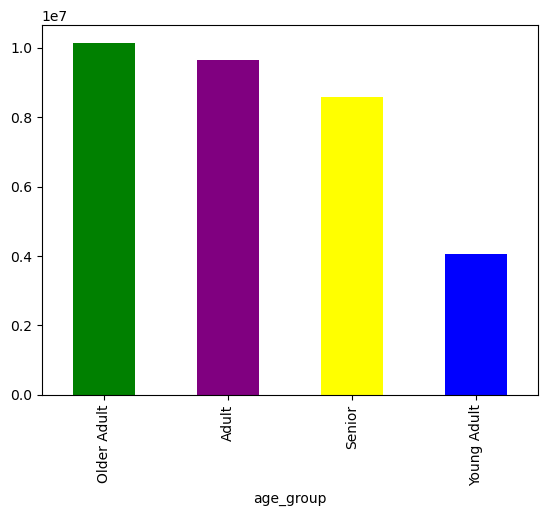

In [55]:
# Age profile visualization
bar=df_final['age_group'].value_counts().plot.bar(color =['green', 'purple', 'yellow','blue'])

In [56]:
bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_agegroup.png'))


In [57]:
# 5.2. Income
# Categorize customers into income categories: low, middle, & high income groups based 
# on standard considerations of US incomes. 

In [58]:
#Ensure you modify the DataFrame directly
df_final.loc[df_final['income'] <= 50000, 'Income_group'] = 'Low'
df_final.loc[(df_final['income'] > 50000) & (df_final['income'] <= 100000), 'Income_group'] = 'Middle'
df_final.loc[df_final['income'] > 100000, 'Income_group'] = 'High'

In [59]:
# Check frequency of income_group and ensure no NaNs
df_final['Income_group'].value_counts(dropna = False) 

Income_group
High      14826255
Middle    14009042
Low        3597733
Name: count, dtype: int64

In [60]:
 # Aggregate for income group order frequency
df_final.groupby('Income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
Income_group                                  
High                      11.040122  0.0  30.0
Low                       11.587035  0.0  30.0
Middle                    11.049206  0.0  30.0

In [61]:
# Aggregate for income group expenditure
df_final.groupby('Income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
Income_group                         
High          16.577213  1.0  99999.0
Low            6.702746  1.0     25.0
Middle         8.472966  1.0  99999.0

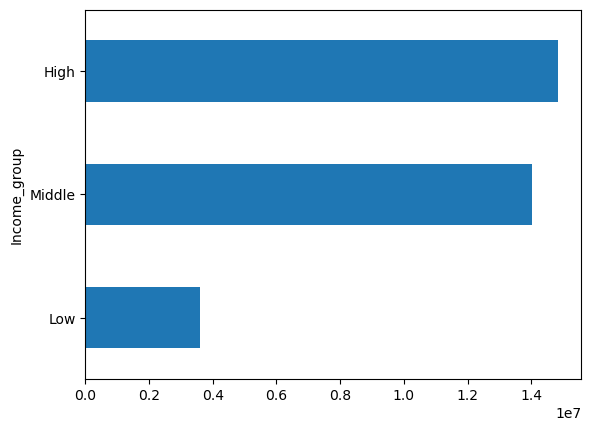

In [62]:
# Income profile visualization
bar2 = df_final['Income_group'].value_counts().sort_values().plot.barh()

In [63]:
bar2.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_incomegroup.png'))

In [64]:
# 5.3. Number of Dependants
# Divide data into customers with dependents and customers without dependents"


In [65]:
df_final.loc[df_final['dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [66]:
# Update 'dependents_flag' where 'number of dependants' is greater than 0
df_final.loc[df_final['dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

In [67]:
#Update 'dependents_flag' where 'nunber of dependants' is 0",
df_final.loc[df_final['dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [68]:
df_final['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    24328189
No Dependants      8104841
Name: count, dtype: int64

In [69]:
 # Aggregate for dependent group order frequency
df_final.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
Has Dependants               11.111987  0.0  30.0
No Dependants                11.080589  0.0  30.0

In [70]:
# Aggregate for dependent group expenditure
df_final.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})   

prices              
                      mean  min      max
dependants_flag                         
Has Dependants   11.931712  1.0  99999.0
No Dependants    12.130265  1.0  99999.0

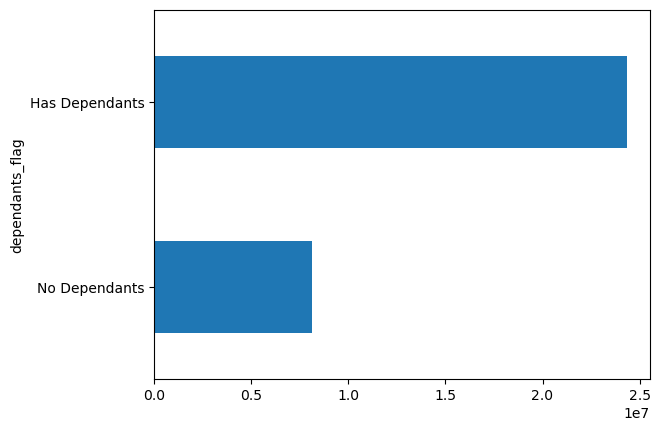

In [71]:
# Number of dependent group profile visualization
bar3 = df_final['dependants_flag'].value_counts().sort_values().plot.barh()

In [72]:
bar3.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_dependentgroup.png'))

In [73]:
import gc
gc.collect()

287

# 6. Visualizations to show distributions of profiles

In [75]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'customer_frequency', 'frequency_flag', 'Gender',
       'State', 'Age', 'date_joined', 'dependants', 'family_status', 'income',
       '_merge', 'region', 'exclusion_flag', 'age_group', 'Income_group',
       'dependants_flag'],
      dtype='object')

In [76]:
user_sample = df_final[['user_id', 'age_group', 'Income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [77]:
#Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [78]:
# Check data
user_sample

,user_id,age_group,Income_group,dependants_flag,region,loyalty_flag
0,38259,Senior,High,Has Dependants,south,New customer
1,196224,Older Adult,Low,Has Dependants,Northeast,Loyal customer
2,138499,Adult,Middle,Has Dependants,Northeast,Regular customer
3,79603,Senior,Middle,Has Dependants,south,New customer
4,50005,Senior,High,Has Dependants,Northeast,Regular customer
...,...,...,...,...,...,...
31958811,136325,Older Adult,Middle,Has Dependants,west,New customer
32072720,80734,Older Adult,Low,Has Dependants,south,New customer
32074097,27382,Senior,Low,Has Dependants,Northeast,Regular customer
32075351,56454,Young Adult,Low,Has Dependants,west,New customer


In [79]:
# loyalty_flag = {'New': 1, 'Regular': 2, 'Loyal': 3}

In [80]:
age_group_counts = user_sample['age_group'].value_counts()

In [81]:
 # An aggregated subset of data with 'prices' column as the total cost of each order
orders_subset = df_final.groupby(['user_id', 'age_group', 'Income_group','dependants_flag', 'loyalty_flag',
'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [82]:
# Rename 'prices' to 'order_total
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [83]:
# Check subset
orders_subset

,user_id,age_group,Income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,2,Senior,Middle,Has Dependants,Regular customer,west,2,10.0,19.0
1,2,Senior,Middle,Has Dependants,Regular customer,west,3,3.0,26.6
2,2,Senior,Middle,Has Dependants,Regular customer,west,4,8.0,96.7
3,2,Senior,Middle,Has Dependants,Regular customer,west,5,8.0,91.4
4,2,Senior,Middle,Has Dependants,Regular customer,west,6,13.0,151.9
...,...,...,...,...,...,...,...,...,...
2907192,206209,Senior,High,Has Dependants,Regular customer,midwest,9,22.0,26.2
2907193,206209,Senior,High,Has Dependants,Regular customer,midwest,10,29.0,64.7
2907194,206209,Senior,High,Has Dependants,Regular customer,midwest,11,30.0,56.1
2907195,206209,Senior,High,Has Dependants,Regular customer,midwest,12,18.0,131.5


In [84]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                'order_total' : ['min', 'mean', 'max']})


In [85]:
# Check
aggregations_by_age_cat

days_since_prior_order                  order_total              \
                               min       mean   max         min        mean   
age_group                                                                     
Adult                          0.0  10.647846  30.0         1.0  119.049230   
Older Adult                    0.0  10.620447  30.0         1.0  123.999816   
Senior                         0.0  10.602525  30.0         1.0  117.140030   
Young Adult                    0.0  10.612563  30.0         1.0  124.355041   

                       
                  max  
age_group              
Adult        100384.5  
Older Adult  100452.9  
Senior       100330.2  
Young Adult  100265.6

In [86]:
# 7.2. Aggregations by Income Group

In [87]:
aggregations_by_income_cat = orders_subset.groupby('Income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                 'order_total' : ['min', 'mean', 'max']})


In [88]:
aggregations_by_income_cat

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
Income_group                                                                   
High                            0.0  10.471080  30.0         1.0  174.283149   
Low                             0.0  11.415049  30.0         1.0   52.686668   
Middle                          0.0  10.515800  30.0         1.0   87.693978   

                        
                   max  
Income_group            
High          100452.9  
Low              875.0  
Middle        100264.7

In [89]:
aggregations_by_dependent_cat = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                 'order_total' : ['min', 'mean', 'max']})


In [90]:
aggregations_by_dependent_cat

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
Has Dependants                     0.0  10.625998  30.0         1.0   
No Dependants                      0.0  10.613310  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
Has Dependants   120.689288  100452.9  
No Dependants    120.941343  100384.5

In [91]:
df_final.to_pickle(os.path.join(path,'Data','Prepared Data','orders_products_customer_merge.pkl'))


In [92]:
import gc
gc.collect()

1753

# 8. Compare customer profiles with regions and departments and identify any links

In [94]:
df_dept_1 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))


In [95]:
df_dept_1

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [96]:
    df_dept_1.rename(columns={'Unnamed: 0':'department_id'},inplace=True)


In [116]:
import gc
gc.collect()

11453

In [118]:
df_dept_1.dtypes

department_id     int64
department       object
dtype: object

In [120]:
df_final.dtypes

product_id                         int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
order_id                           int64
add_to_cart_order                  int64
reordered                          int64
user_id                            int64
eval_set                          object
order_number                       int64
order_dow                          int64
order_hour_of_day                  int64
days_since_prior_order           float64
max_order                          int64
loyalty_flag                      object
average_spend                    float64
spender_flag                      object
customer_frequency               float64
frequency_flag                    object
Gender                            object
State                             object
Age                                int64
date_joined               datetime64[ns]
dependants      

In [136]:
import gc
gc.collect()

1763

In [138]:
import contextlib

@contextlib.contextmanager
def clear_memory():
    try:
        yield
    finally:
        gc.collect()

with clear_memory(): df_final_dept = df_final.merge(df_dept_1,on='department_id',indicator= 'merge indicator')

In [ ]:
df_final_dept = df_final.merge(df_dept_1,on='department_id',indicator= 'merge indicator')

In [140]:
df_final_dept.to_pickle(os.path.join(path,'Data','Prepared Data','orders_products_customer_department_merge.pkl'))


In [142]:
df_final_dept['department'].value_counts()


department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447634
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [144]:
import gc
gc.collect()

3508

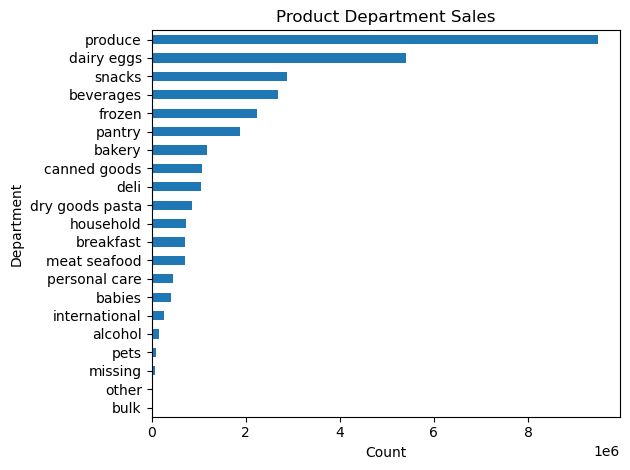

In [146]:
#Creating department bar chart\n",
dept_bar=df_final_dept['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [148]:
dept_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','department_product_bar.png'))


In [150]:
age_department_comparison=pd.crosstab(df_final_dept['age_group'],df_final_dept['department'],dropna=False)


<Figure size 2500x2500 with 0 Axes>

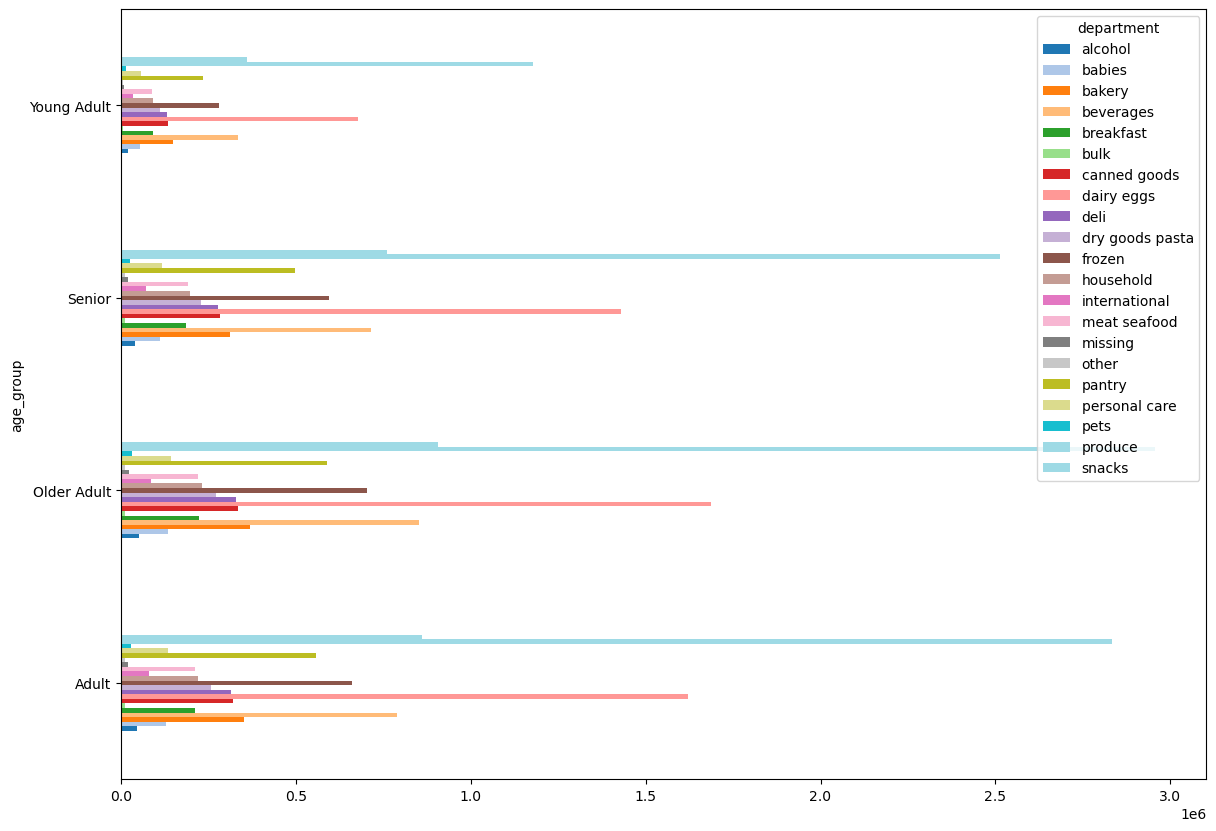

In [152]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)
    


In [156]:
age_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','age_department_comparison_bar.png'))

Text(0, 0.5, 'age_Group')

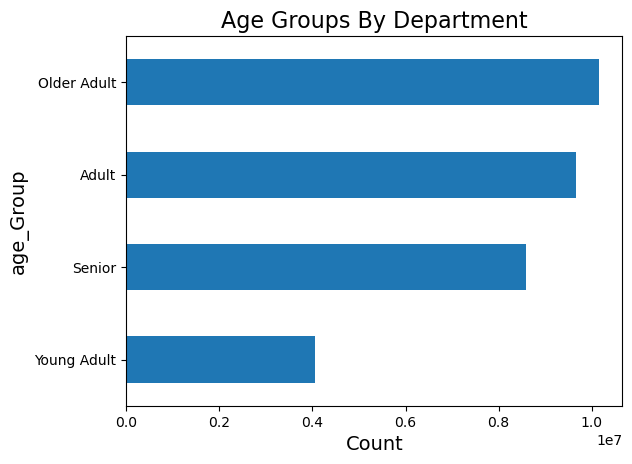

In [174]:
dept_age_bar=df_final_dept['age_group'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('age_Group', fontsize=14)

In [176]:
dept_age_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','dept_age_bar.png'))

<Figure size 2500x2500 with 0 Axes>

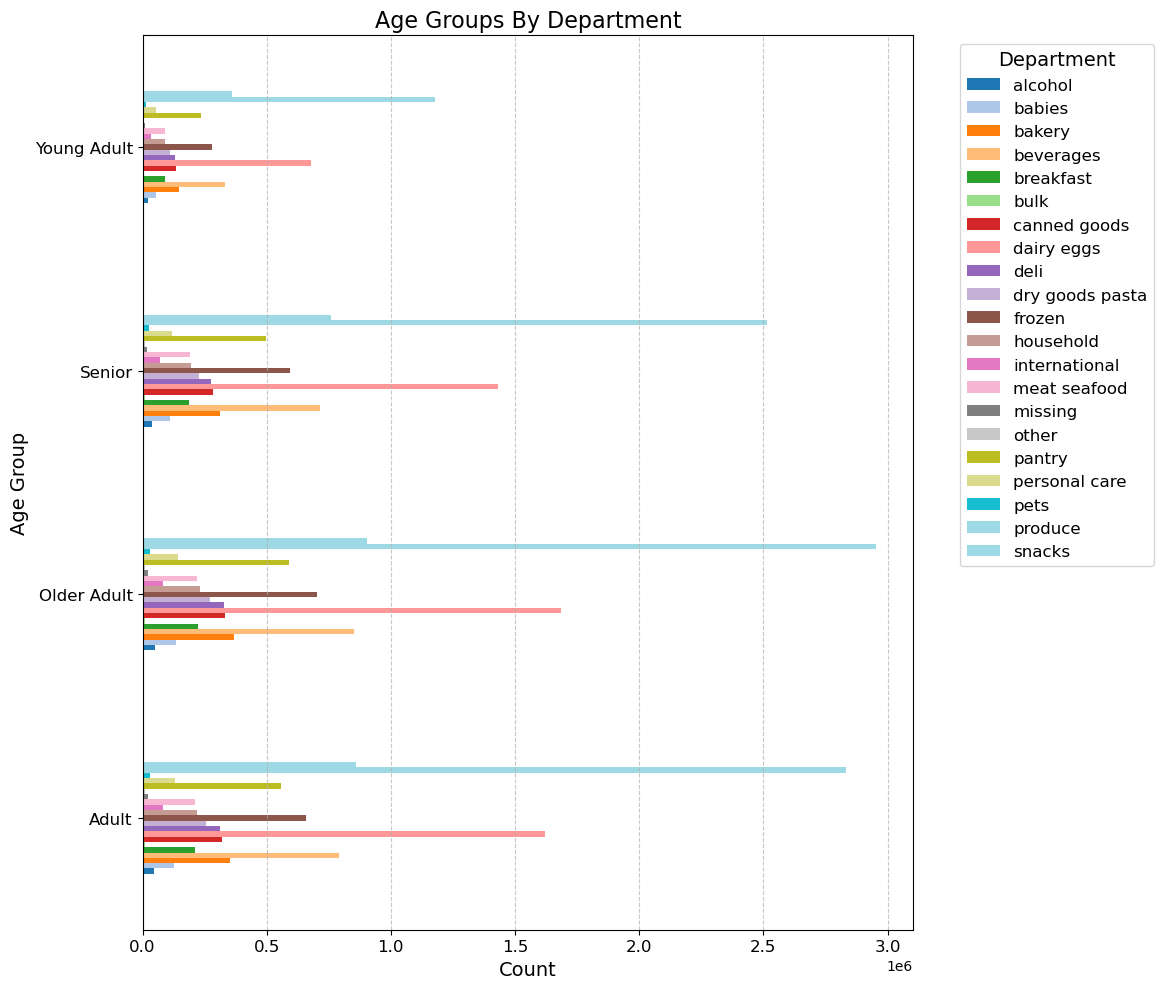

In [180]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)
    
 #Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
    
    # Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
    
# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [184]:
age_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','age_department_comparison_bar1.png'))

In [192]:
#Creating crosstab to compare income_group profile with departments
income_group_department_comparison=pd.crosstab(df_final_dept['Income_group'],df_final_dept['department'],dropna=False)

<Figure size 1800x1200 with 0 Axes>

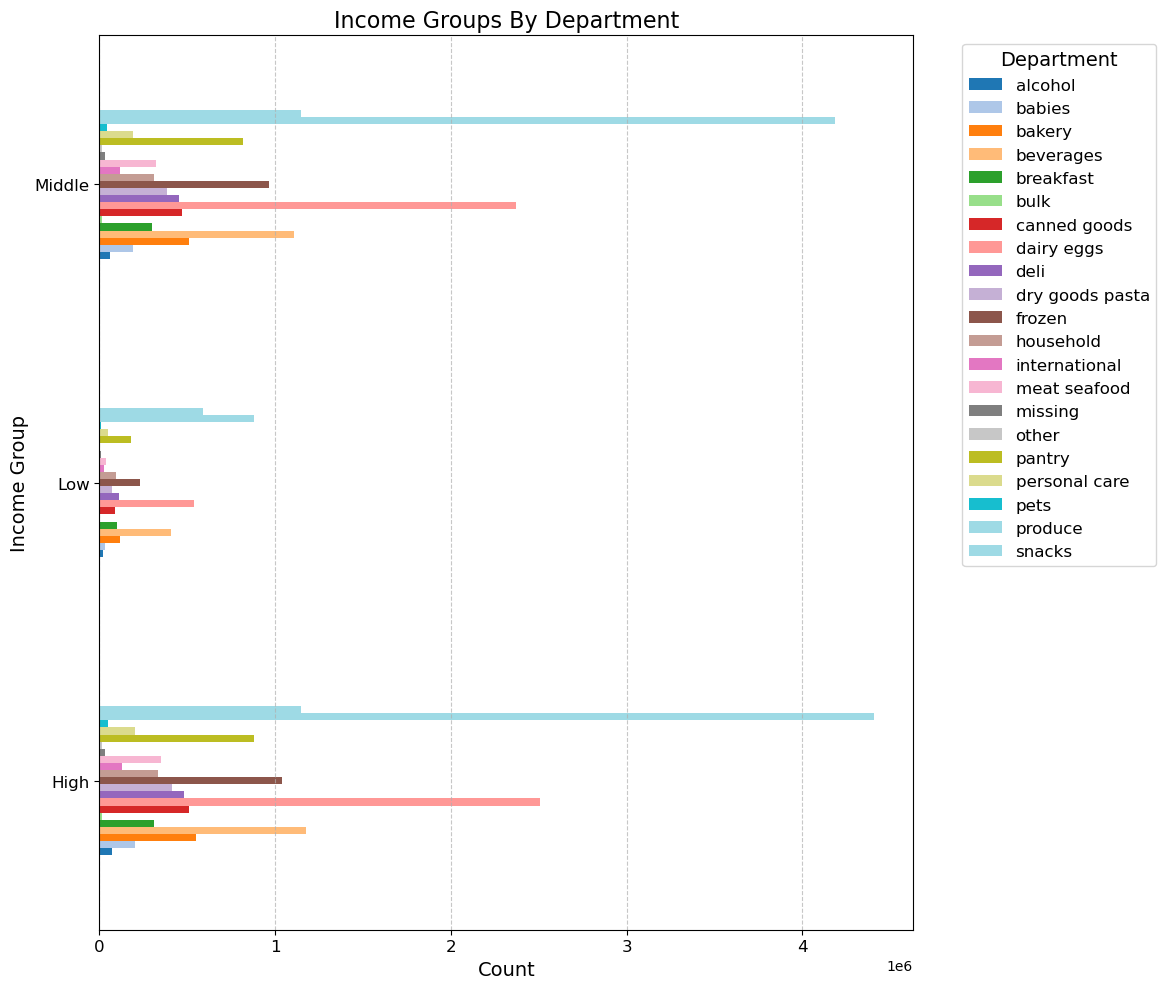

In [226]:


# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh', 
    figsize=(14, 10), 
    colormap='tab20', rot=0)


# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


In [228]:
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','income_group_department_comparison_bar.png'))


In [230]:
region_department_comparison=pd.crosstab(df_final_dept['region'],df_final_dept['department'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

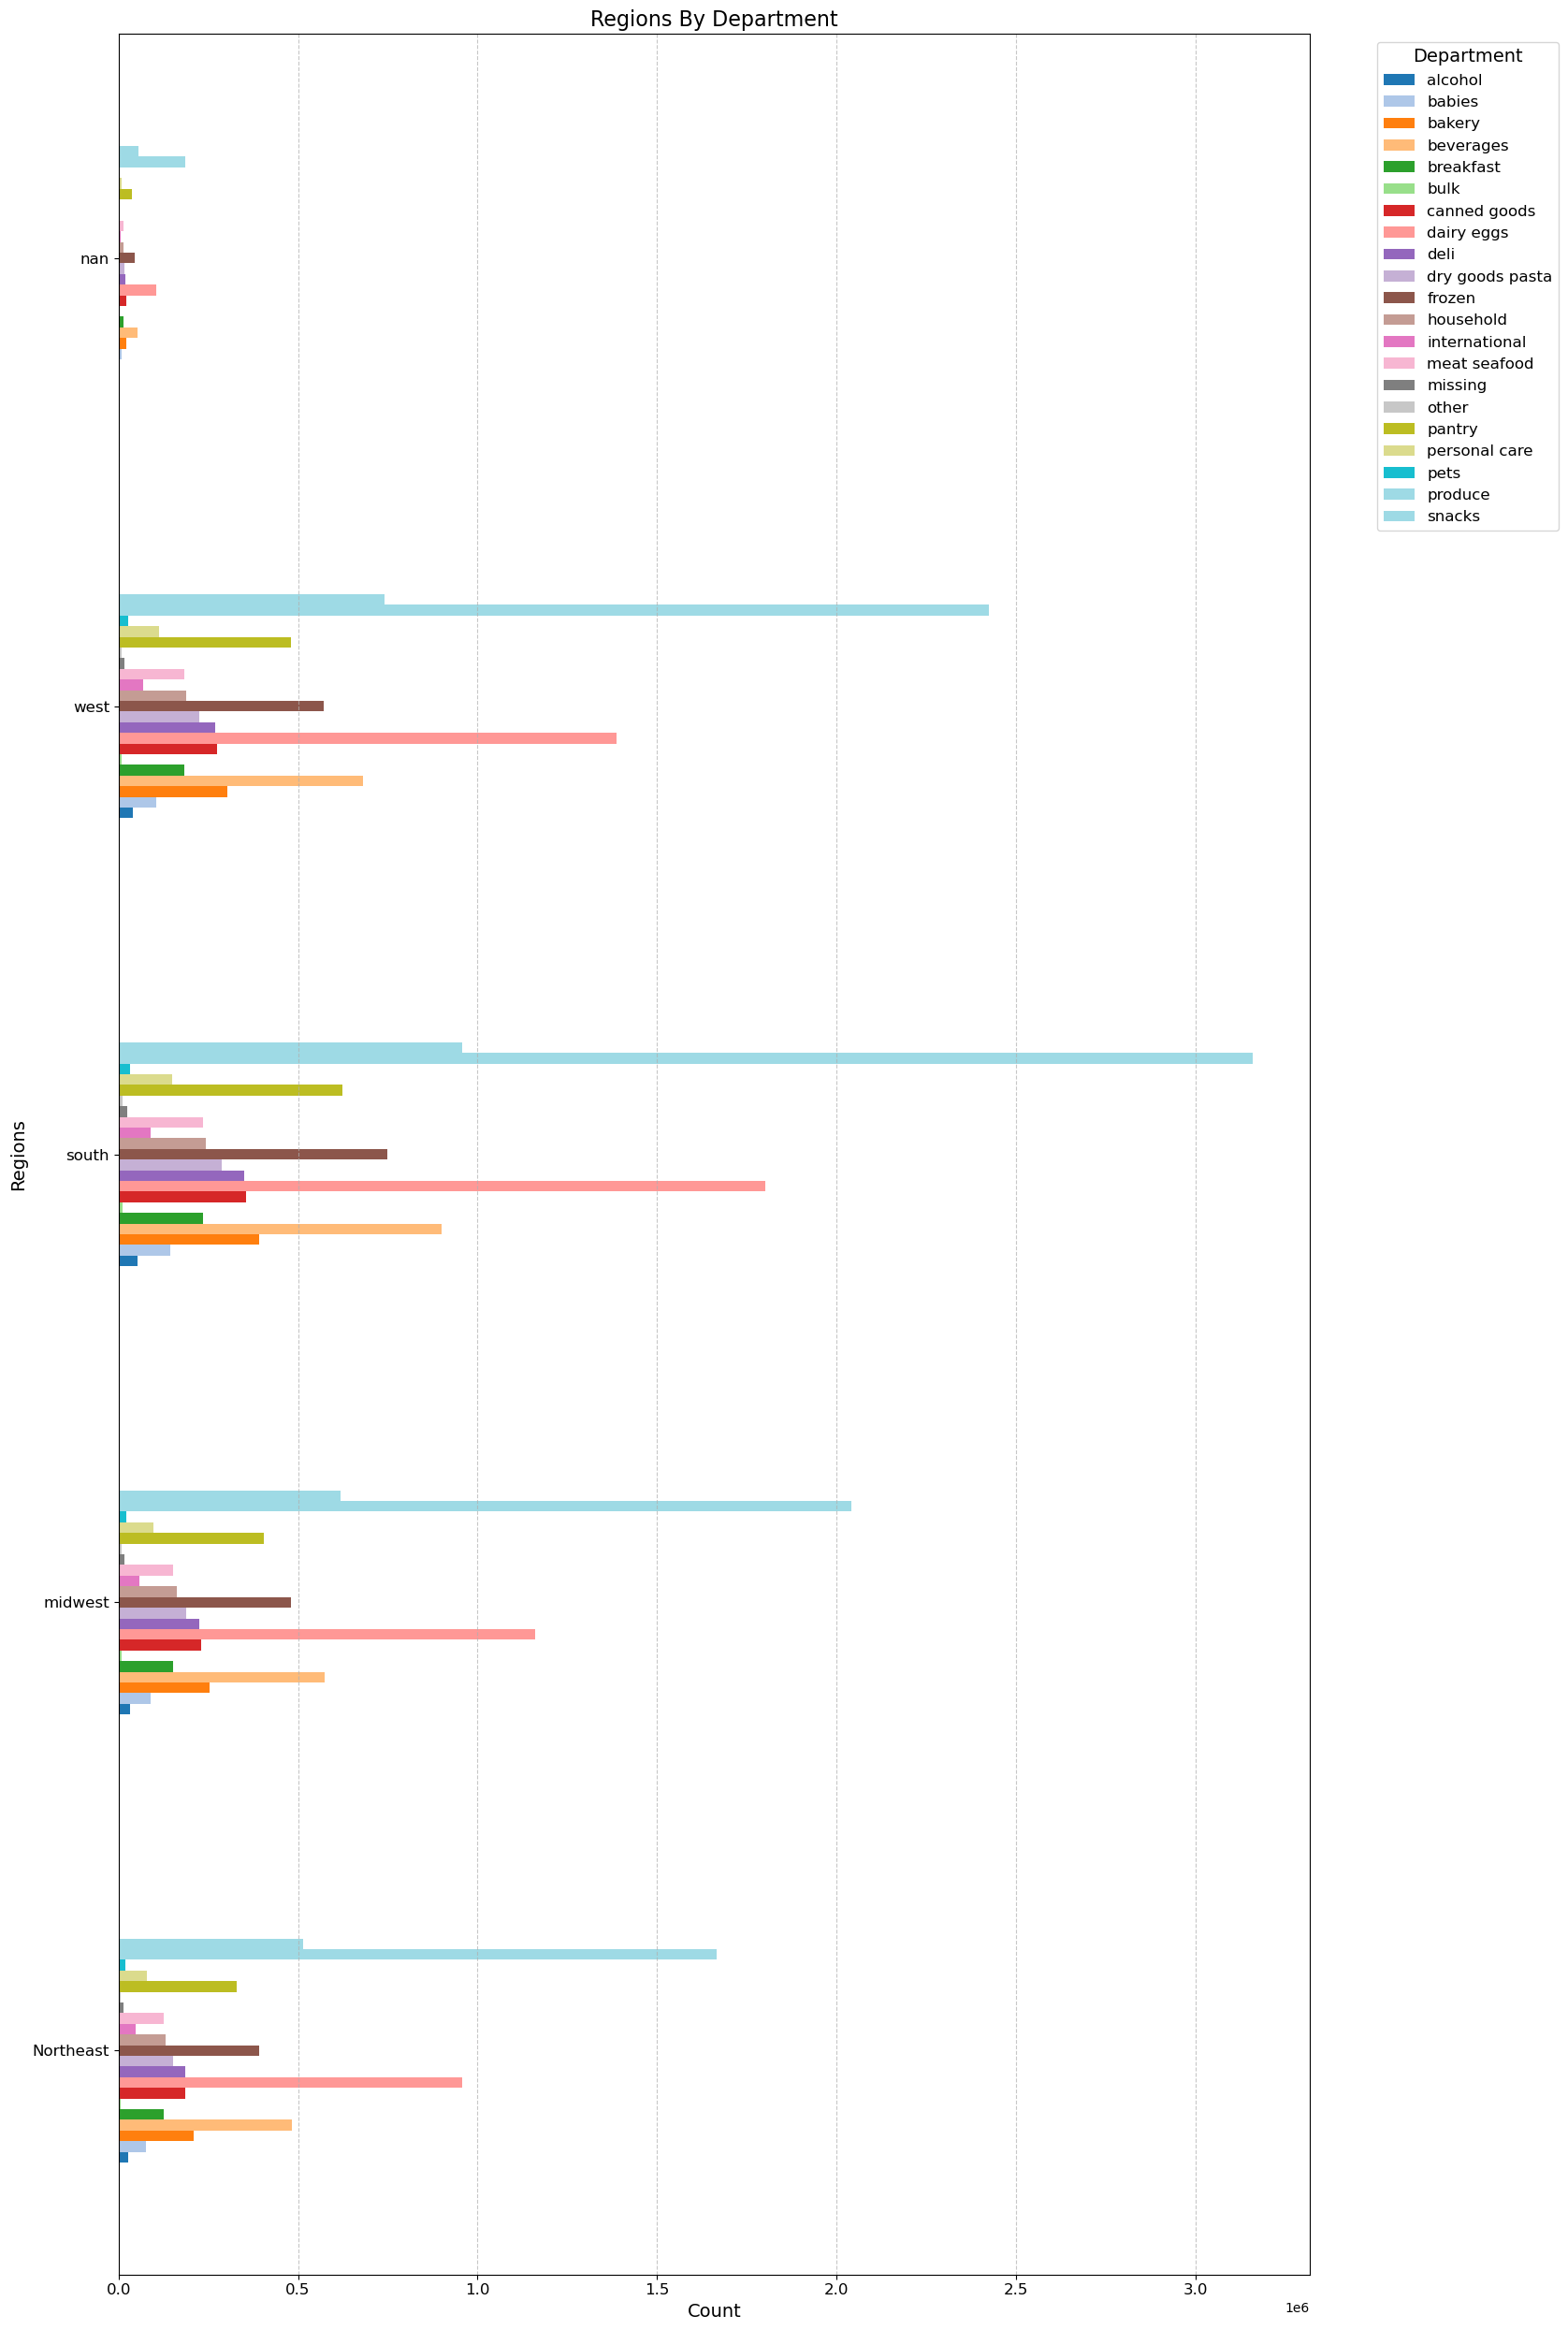

In [232]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [234]:
region_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','region_department_comparison_bar.png'))

# Extra Graphs for Project Analysis

In [243]:
import gc
gc.collect()

19916

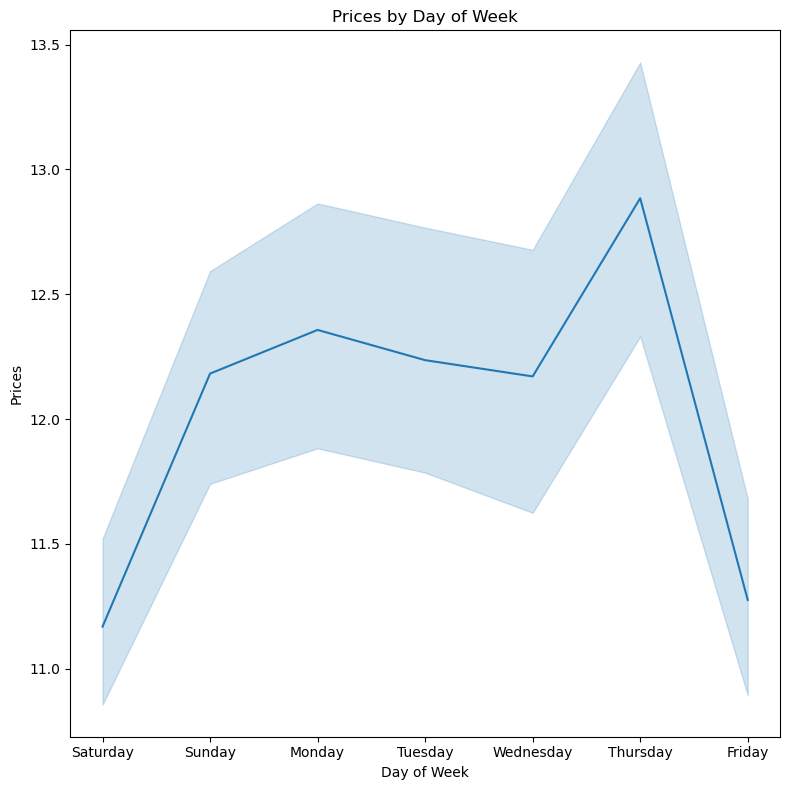

In [245]:
# Creating reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Line Chart
plt.figure(figsize=(8, 8))
prices_by_day_of_week_line=sns.lineplot(data=df_final_dept,x='order_dow',y='prices')
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [247]:
import gc
gc.collect()


5084

In [249]:
prices_by_day_of_week_line.figure.savefig(os.path.join(path,'Analysis','Visualization','prices_by_day_of_week_line.png'))

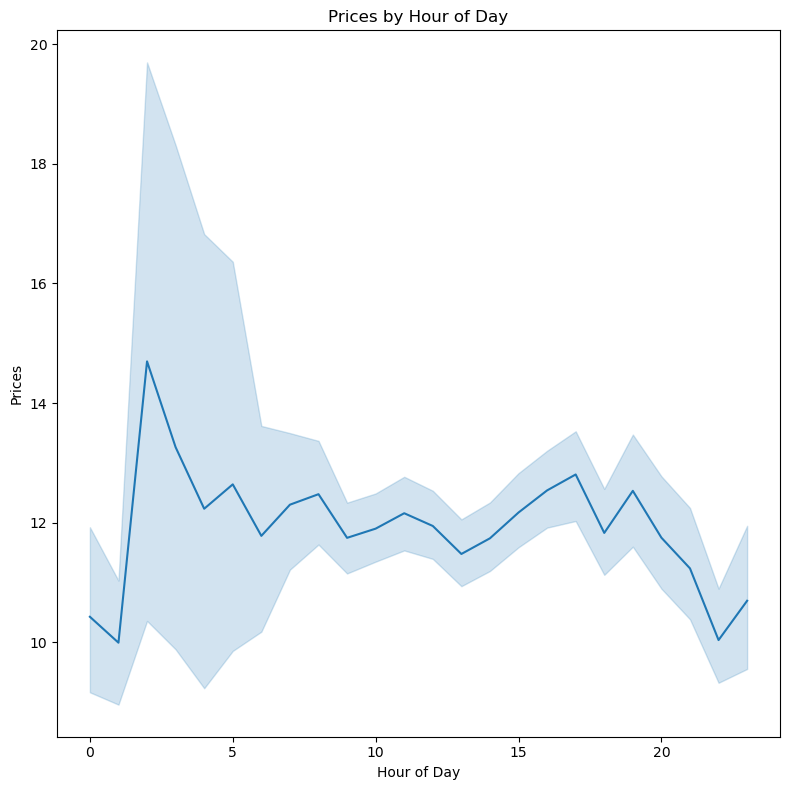

In [251]:
plt.figure(figsize=(8, 8))
prices_by_order_hour_of_day_line=sns.lineplot(data=df_final_dept,x='order_hour_of_day',y='prices')
plt.title('Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()

In [255]:
prices_by_order_hour_of_day_line.figure.savefig(os.path.join(path,'Analysis','Visualization','prices_by_order_hour_of_day_line.png'))

In [257]:
import gc
gc.collect()

5990

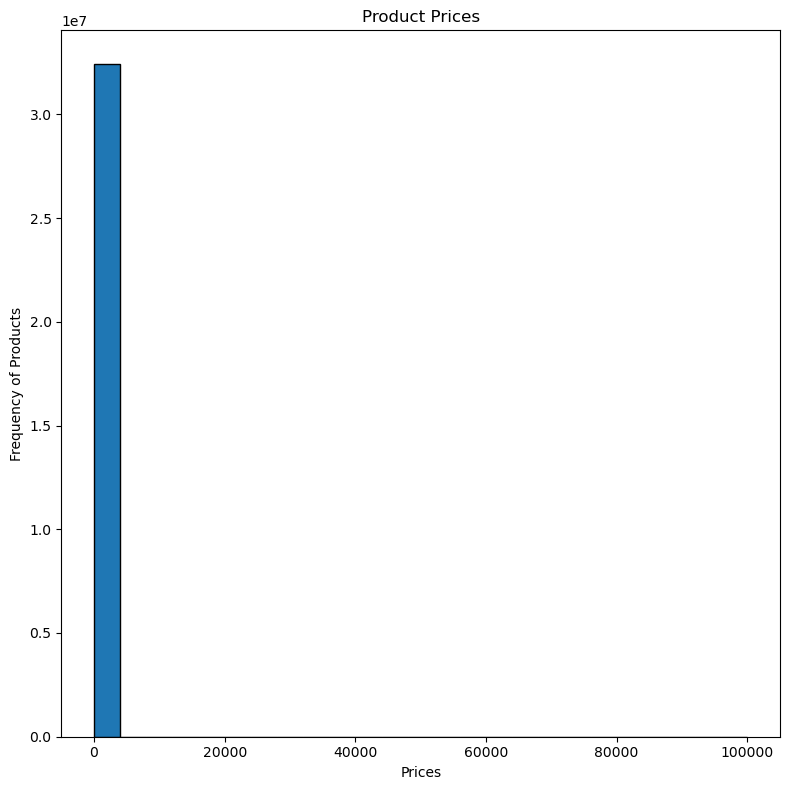

In [263]:
# Histogram of product prices
plt.figure(figsize=(8, 8))
prod_price_hist=df_final['prices'].plot.hist(bins=25,edgecolor='black')
plt.title('Product Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency of Products')
plt.tight_layout()
plt.show()

In [265]:
# Exporting Product Pricing Histogram
prod_price_hist.figure.savefig(os.path.join(path,'Analysis','Visualization','prod_price_hist.png'))

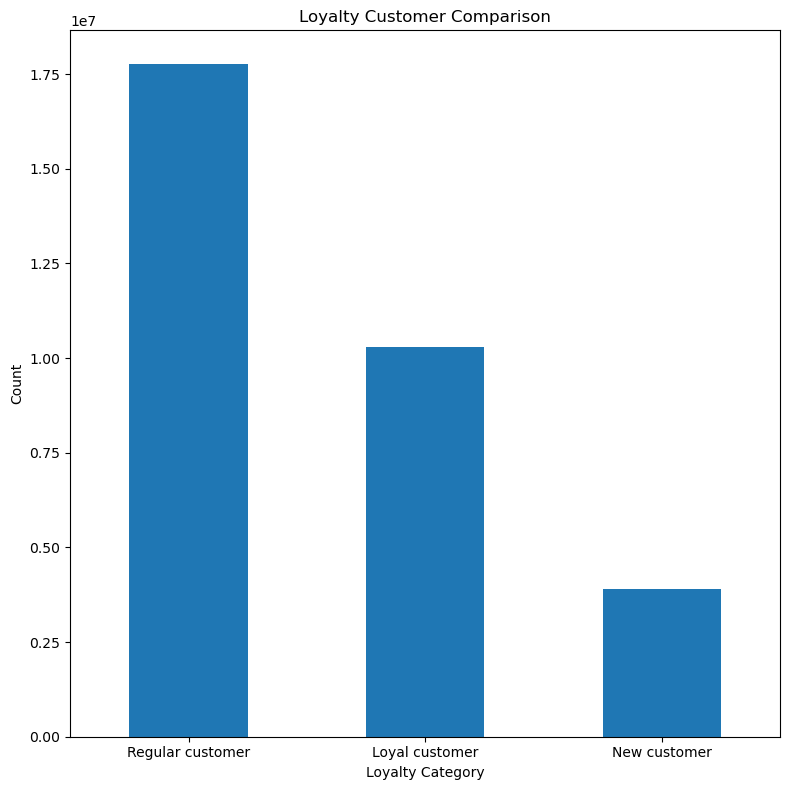

In [269]:
# Creating bar chart for customer loyalty breakdown
plt.figure(figsize=(8,8))
loyalty_customer_comparison_bar= df_final['loyalty_flag'].value_counts().plot(kind='bar', rot=0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [271]:
# Exporting Loyalty Customer Comparison Bar Chart
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','loyalty_customer_comparison_bar.png'))

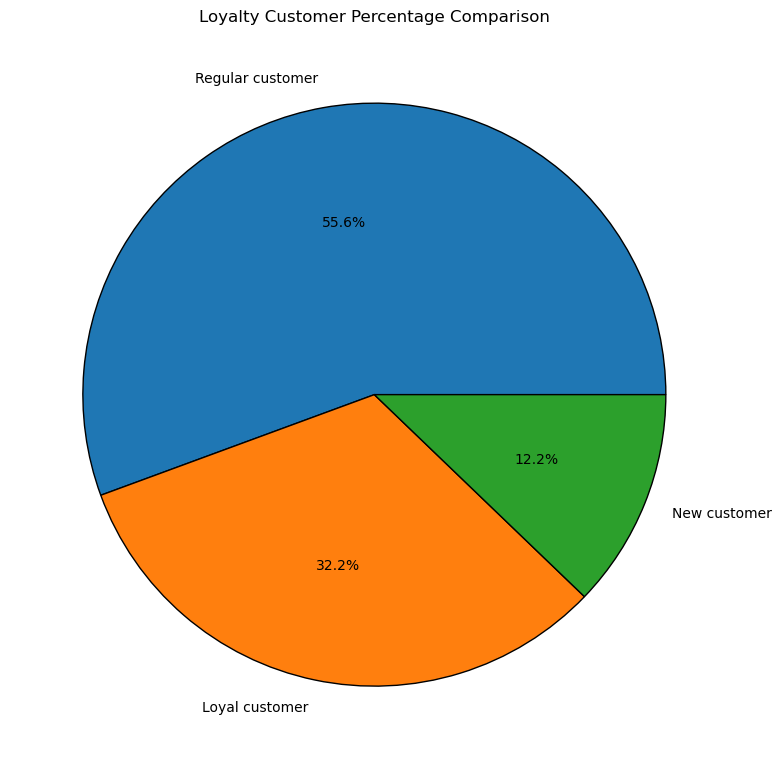

In [273]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie= df_final['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [275]:
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'Analysis','Visualization','loyalty_customer_comparison_pie.png'))

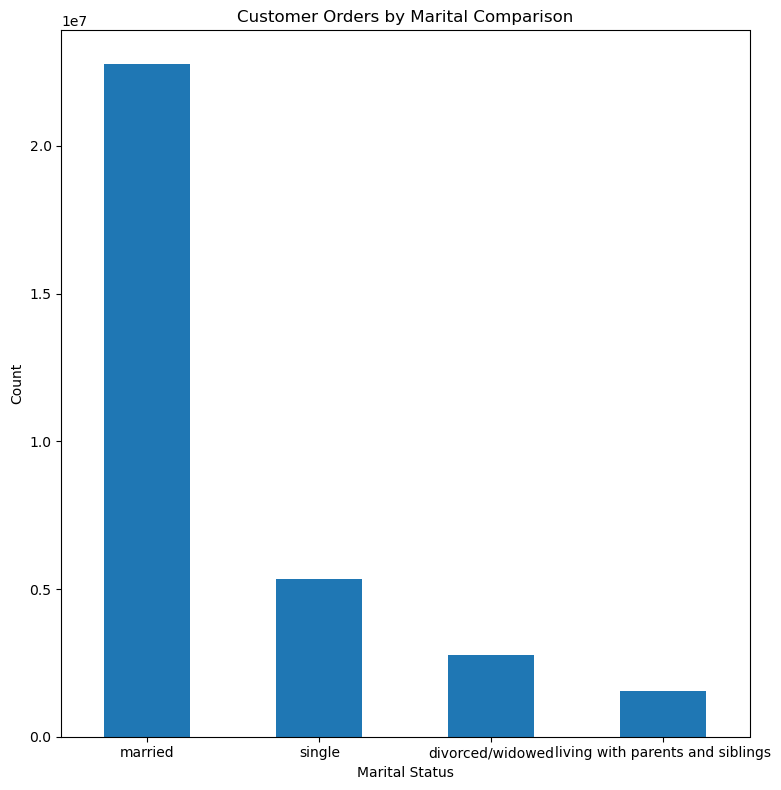

In [277]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
marital_status_comparison_bar= df_final['family_status'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [279]:
# Export bar chart of customer marital status orders
marital_status_comparison_bar.figure.savefig(os.path.join(path,'Analysis','Visualization','marital_status_comparison_bar.png'))

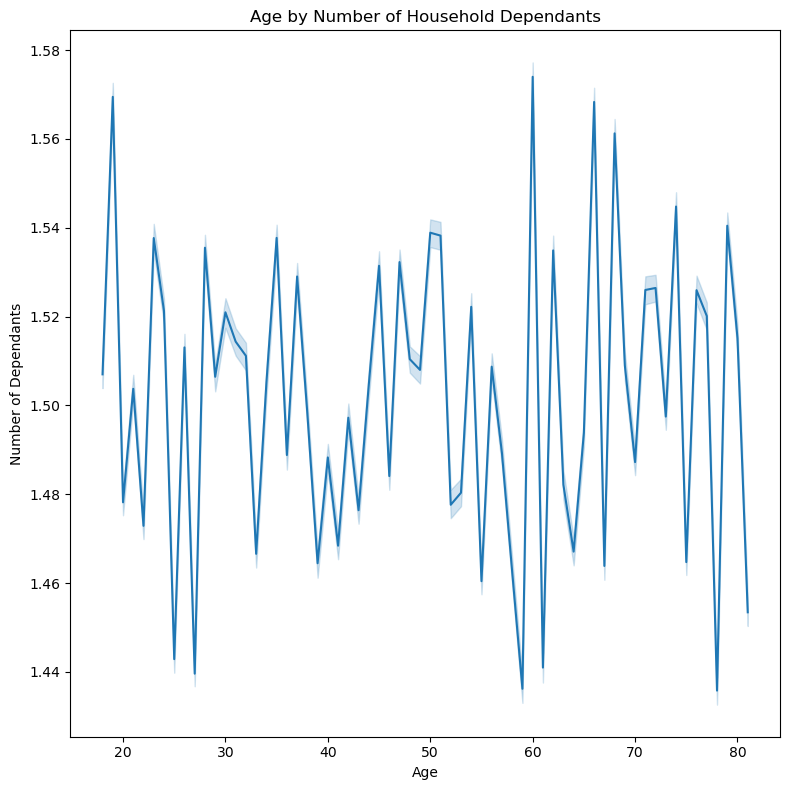

In [283]:
# Creating Line Chart age by num_of_dependants comparison
plt.figure(figsize=(8, 8))
age_by_dependants_line=sns.lineplot(data=df_final,x='Age',y='dependants')
plt.title('Age by Number of Household Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.tight_layout()
plt.show()

In [285]:
# Exporting line chart age by num_of_dependants comparison
age_by_dependants_line.figure.savefig(os.path.join(path,'Analysis','Visualization','age_by_dependants_line.png'))

In [287]:
import gc
gc.collect()

19070

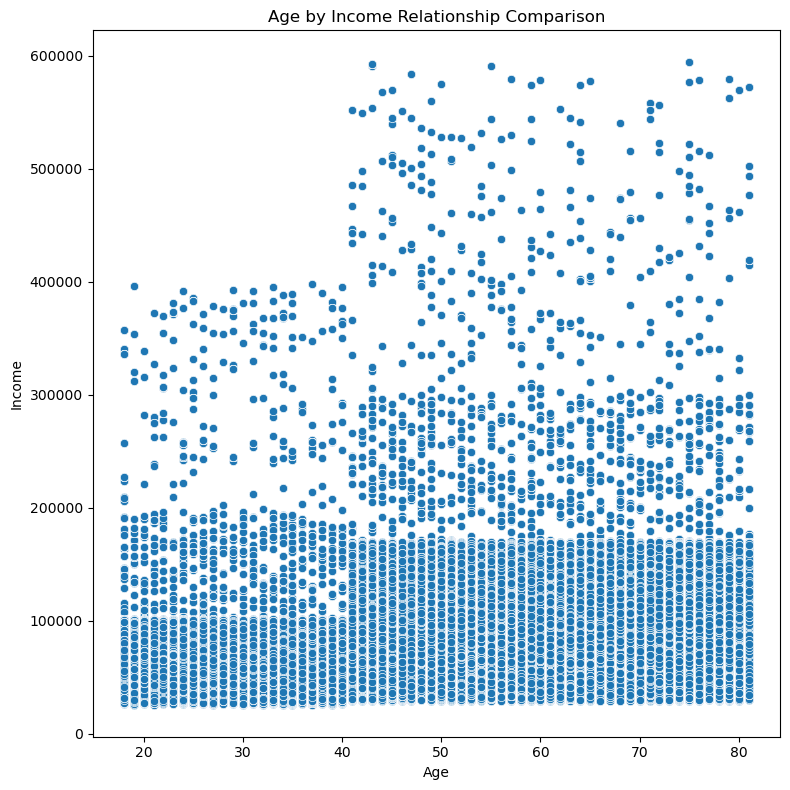

In [289]:
# Creating scatterplot for age by income comparison
plt.figure(figsize=(8, 8))
age_income_comparison_scat=sns.scatterplot(x = 'Age', y = 'income',data = df_final)
plt.title('Age by Income Relationship Comparison')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

In [291]:
# Exporting scatterplot age by income comparison
age_income_comparison_scat.figure.savefig(os.path.join(path,'Analysis','Visualization','age_income_comparison_scat.png'))